In [17]:
import numpy as np
from scipy.linalg import expm
from qiskit import *

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$ 

# 1) Density Matrix - Covariance Matrix

We are given a matrix $\sigma_{2} = \begin{pmatrix} \alpha_{1} && \alpha \\ \alpha && \alpha_{2} \end{pmatrix}$ and we normalize it respect to its trace: 

$$ \rho_{2} = \frac{\sigma_{2}}{tr(\sigma_{2})} = \begin{pmatrix} \frac{\alpha_{1}}{\alpha_{1}+\alpha_{2}} && \frac{\alpha}{\alpha_{1}+\alpha_{2}} \\ \frac{\alpha}{\alpha_{1}+\alpha_{2}} && \frac{\alpha_{2}}{\alpha_{1}+\alpha_{2}} \end{pmatrix} $$

In [6]:
sigma2 = np.array([(1.89,0.97), (0.97, 1.06)])
rho2 = sigma2 /np.matrix.trace(sigma2)

We now calculate with numpy the eigenvalues and the eigenvectors using a classical algorithm:

In [10]:
eigenvalues,(eigenvector1, eigenvector2)= np.linalg.eig(rho2)

In [13]:
print(eigenvalues)

[0.85764318 0.14235682]


# 2) Calculate the unitary matrix gate

We know that the matrix could be turn into a unitary matrix by taking the exponential imaginary:

$$ U_{\rho_{2}} = e^{2\pi i \rho_{2}} $$ 

In [22]:
unitary_matrix = expm(2*1j*np.pi*rho2)

In [23]:
print(unitary_matrix)

[[ 6.25944518e-01-0.30675878j -4.26408010e-16-0.71700245j]
 [-4.90557316e-16-0.71700245j  6.25944518e-01+0.30675878j]]


# 3) Building the quantum circuit

We will use two qubits to calculate the eigenvalue and one for the eigenvector. The eigenvector will be initalized as random vector (concretely we applied the Hadamard gate to the state $\ket{0}{}$ so the state will be $H\ket{0}{}$):


In [112]:
num_qubits = 3
quantum_circuit = QuantumCircuit(num_qubits, num_qubits)
initial_state_vector = [ 1/np.sqrt(2), 1/np.sqrt(2)]
# quantum_circuit.initialize(initial_state_vector, num_qubits-1);

In [113]:
quantum_circuit.h(0)
quantum_circuit.h(1)
quantum_circuit.h(2);

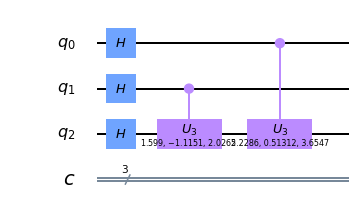

In [114]:
(th1, ph1, lam1) = qiskit.quantum_info.synthesis.two_qubit_decompose.euler_angles_1q(unitary_matrix)
quantum_circuit.cu3(th1, ph1, lam1, 1, 2)

(th2, ph2, lam2) = qiskit.quantum_info.synthesis.two_qubit_decompose.euler_angles_1q(expm(2*1j*np.pi*rho2*2))
quantum_circuit.cu3(th2, ph2, lam2, 0, 2)

quantum_circuit.draw(output='mpl')

In [115]:
quantum_circuit.h(0)
quantum_circuit.crz(-np.pi/2,0,1)
quantum_circuit.h(1)

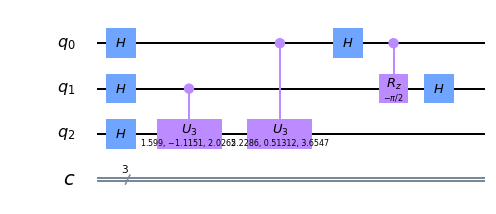

In [116]:
quantum_circuit.draw(output='mpl')

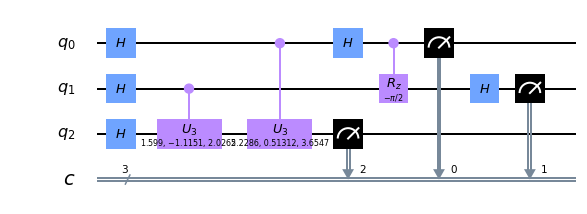

In [117]:
quantum_circuit.measure([0,1,2],[0,1,2])
quantum_circuit.draw(output='mpl')

In [120]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 8192
results = execute(quantum_circuit, backend=backend, shots=shots).result()
print(results.get_counts())

{'001': 205, '100': 2551, '111': 24, '110': 68, '011': 96, '010': 323, '101': 107, '000': 4818}


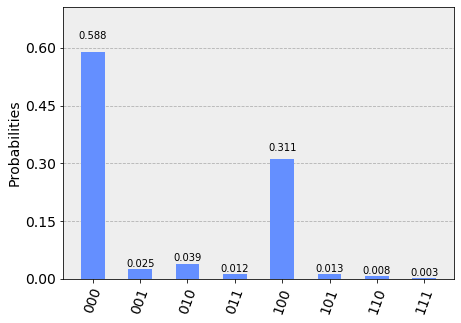

In [121]:
from qiskit.visualization import * 
plot_histogram(results.get_counts())